# Exploratory Data Analysis for Customer Churn




# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

from utils.customers_data_prep   import CustomersDataPrep
from utils.customers_feature_eng import CustomersFeatureEng

import warnings
warnings.filterwarnings('ignore')

# Data Comprehension

> Data Dictionary:

- **gender**: Gender of the customer (Male or Female).
- **SeniorCitizen**: Indicator if the customer is a senior citizen or not (1, 0).
- **Partner**: Whether the customer has a partner (Yes, No).
- **Dependents**: Whether the customer has dependents (Yes, No).
- **tenure**: Number of months the customer has stayed with the company.
- **PhoneService**: Whether the customer has a phone service (Yes, No).
- **MultipleLines**: Whether the customer has multiple lines (Yes, No, No phone service).
- **InternetService**: Customer’s internet service provider (DSL, Fiber optic, No).
- **OnlineSecurity**: Whether the customer has online security (Yes, No, No internet service).
- **OnlineBackup**: Whether the customer has online backup (Yes, No, No internet service).
- **DeviceProtection**: Whether the customer has device protection (Yes, No, No internet service).
- **TechSupport**: Whether the customer has tech support (Yes, No, No internet service).
- **StreamingTV**: Whether the customer has streaming TV (Yes, No, No internet service).
- **StreamingMovies**: Whether the customer has streaming movies (Yes, No, No internet service).
- **Contract**: The contract term of the customer (Month-to-month, One year, Two year).
- **PaperlessBilling**: Whether the customer has paperless billing (Yes, No).
- **PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card).
- **MonthlyCharges**: The amount charged to the customer monthly.
- **TotalCharges**: The total amount charged to the customer.
- **Churn**: Whether the customer churned or not (Yes, No).

---

> Questions:

1. Do people who churn are mainly that with high tenure (used a lot and found a better service)?

2. Do most people who drop out have a monthly contract (is it harder to stay loyal than an annual contract)?

3. Do most people who drop out use DSL or no internet service at all (they drop out due to limited resources)?

4. Are there pricing inconsistencies in the services provided (any service too expensive for a specific scenario)?

5. Of the people who abandoned the company's services, is there a high rate of services that they had not contracted for (services that perhaps would have made a difference in the user experience)?

---

In [2]:
df = pd.read_csv("customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"118,75","8672,45",No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,"118,65","8477,6",No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,"118,6","7990,05",No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,"118,6","7365,7",No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),"118,35","7804,15",Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

> Wups, missing values:
- TotalCharges

---

In [5]:
df[df.TotalCharges.isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2531,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,"80,85",NaN,No
3343,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,"73,35",NaN,No
4023,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),"61,9",NaN,No
4315,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),"56,05",NaN,No
4583,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),"52,55",NaN,No
5484,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,"25,75",NaN,No
5549,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,"25,35",NaN,No
6213,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,"20,25",NaN,No
6429,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20,NaN,No
6562,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,"19,85",NaN,No


In [6]:
check_up = df[df.TotalCharges.isnull()].customerID == df[df.tenure == 0].customerID
check_up.dot(check_up)

True

> The people with zero tenure are the same with not-a-number in Total Charges

> The Total Charges of this people is a not-a-number because they didn't have any service tenure time.

---

In [7]:
df[df.tenure == 1].sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6324,1240-KNSEZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,"20,1","20,1",Yes
3081,3627-FHKBK,Female,0,No,No,1,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,"75,3","75,3",Yes
2775,5919-TMRGD,Female,0,No,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,"79,35","79,35",Yes
6861,8393-JMVMB,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,"19,45","19,45",No
5034,4847-QNOKA,Female,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),"44,9","44,9",Yes


In [8]:
tenure_1 = df[df.tenure == 1].count()[0]
tenure_1_equals = df[(df.tenure == 1) & (df.MonthlyCharges == df.TotalCharges)].count()[0]
month_total_equals = df[(df.MonthlyCharges == df.TotalCharges)].count()[0]

print("Quantity of individuals with tenure equals to 1: ", tenure_1)
print()
print("Quantity of individuals with Monthly Charges equals to the Total Charges: ", month_total_equals)
print()
print("Quantity of individuals with tenure equals to 1 and \nMonthly Charges equals to the Total Charges: ", tenure_1_equals)

Quantity of individuals with tenure equals to 1:  613

Quantity of individuals with Monthly Charges equals to the Total Charges:  613

Quantity of individuals with tenure equals to 1 and 
Monthly Charges equals to the Total Charges:  613


> Ok, so in 1's tenure the charge will be the same in total and monthly. Then, let's set the Total Charge of 0's tenure to 0, we can't use the monthly charge to the total in 0's tenure with NaN total charge because it will bring ambiguity to the analysis.

---

In [9]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [10]:
columns = df.columns[df.nunique() < 10].tolist()

for col in columns:
    print(col, '-', df[col].unique())

gender - ['Female' 'Male']
SeniorCitizen - [0 1]
Partner - ['Yes' 'No']
Dependents - ['Yes' 'No']
PhoneService - ['Yes' 'No']
MultipleLines - ['Yes' 'No' 'No phone service']
InternetService - ['Fiber optic' 'DSL' 'No']
OnlineSecurity - ['Yes' 'No' 'No internet service']
OnlineBackup - ['Yes' 'No' 'No internet service']
DeviceProtection - ['Yes' 'No' 'No internet service']
TechSupport - ['Yes' 'No' 'No internet service']
StreamingTV - ['Yes' 'No' 'No internet service']
StreamingMovies - ['Yes' 'No' 'No internet service']
Contract - ['Two year' 'One year' 'Month-to-month']
PaperlessBilling - ['Yes' 'No']
PaymentMethod - ['Bank transfer (automatic)' 'Electronic check' 'Mailed check'
 'Credit card (automatic)']
Churn - ['No' 'Yes']


# Data Preparation

In [11]:
data_preparer = CustomersDataPrep()
feature_engine = CustomersFeatureEng()

In [12]:
df = data_preparer.prepare_data(df=df, conditionals=False)

# Exploratory Data Analysis

## Descriptive Data Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.00,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
PaperlessBilling,7043.0,0.592219,0.491457,0.00,0.00,1.00,1.00,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.00,1.00


In [15]:
df.describe(include=[bool, object]).T

,count,unique,top,freq
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473
StreamingTV,7043,3,No,2810
StreamingMovies,7043,3,No,2785
Contract,7043,3,Month-to-month,3875
PaymentMethod,7043,4,Electronic check,2365


In [16]:
print("Basic infos:")
print(f"Features: {df.shape[1]}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicated values: {df.duplicated().sum()}")

print("\nBig-Numbers")
print(f"Customers: {df.shape[0]} (100%)")
print(f"Customers churn: {df['Churn'].sum()} ({round(df['Churn'].mean()*100, 2)}%)")

Basic infos:
Features: 20
Missing values: 0
Duplicated values: 22

Big-Numbers
Customers: 7043 (100%)
Customers churn: 1869 (26.54%)


In [17]:
numerical_columns = ["tenure", "MonthlyCharges", "TotalCharges"]
categorical_columns = list(set(df.columns.tolist()) - set(numerical_columns) - set(["customerID"]))

print("Numerical columns: ", numerical_columns)
print("Categorical columns: ", categorical_columns)

Numerical columns:  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns:  ['PaymentMethod', 'PhoneService', 'SeniorCitizen', 'Dependents', 'Churn', 'Partner', 'Contract', 'StreamingMovies', 'OnlineSecurity', 'MultipleLines', 'StreamingTV', 'DeviceProtection', 'OnlineBackup', 'PaperlessBilling', 'InternetService', 'TechSupport', 'gender']


### Numerical Values

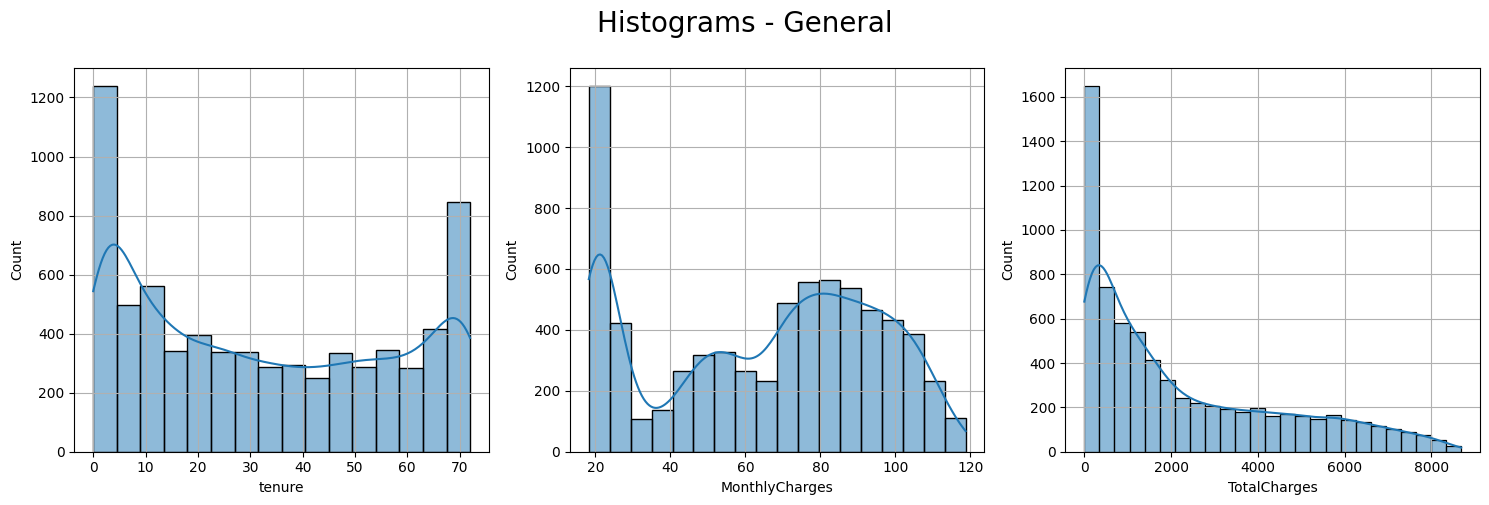

In [18]:
ncols=3
nrows=1

fig, axs = plt.subplots(ncols=ncols, figsize=(15, 5))

for i in range(ncols):
    axs[i].grid()
    sns.histplot(
        data=df,
        x=numerical_columns[i],
        kde=True,
        ax=axs[i]
    )

fig.suptitle("Histograms - General", fontsize=20, y=1.0)
fig.tight_layout()
plt.show()

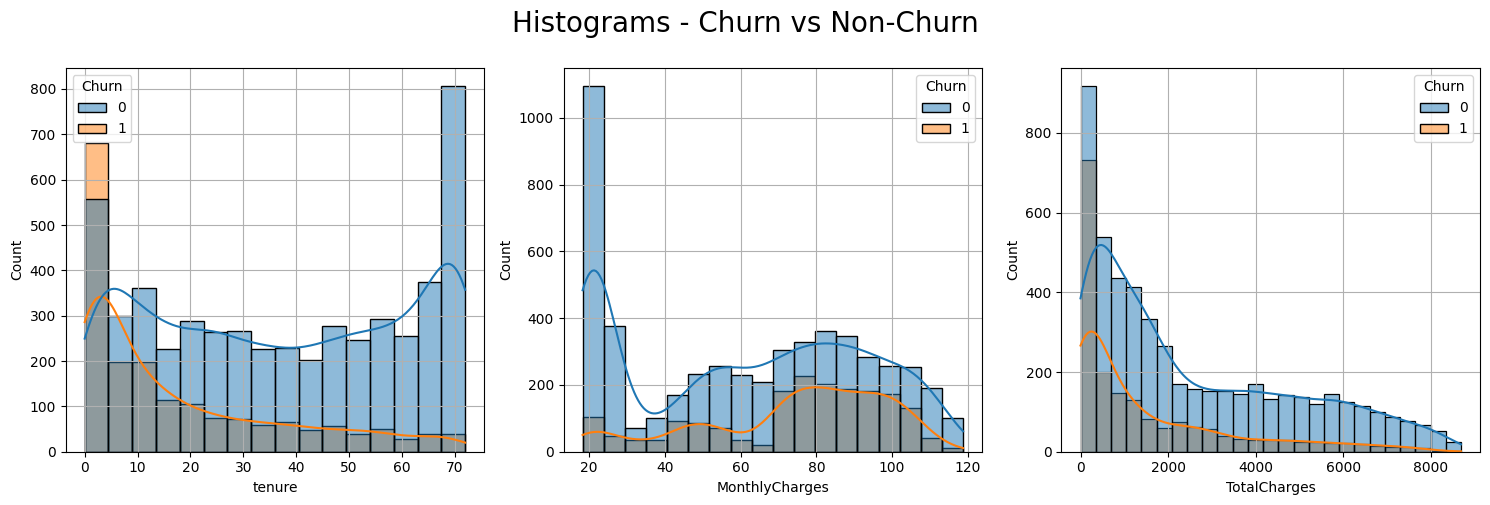

In [19]:
ncols=3
nrows=1

fig, axs = plt.subplots(ncols=ncols, figsize=(15, 5))

for i in range(ncols):
    axs[i].grid()
    sns.histplot(
        data=df,
        x=numerical_columns[i],
        kde=True,
        ax=axs[i],
        hue="Churn",
        hue_order=[0, 1]
        )

fig.suptitle("Histograms - Churn vs Non-Churn", fontsize=20, y=1.0)
fig.tight_layout()
plt.show()

> Attention point: low tenure (<= 10) must be investigated (What the churned people in low tenure have different from non-churned?). Rarely high tenure people give up the service.

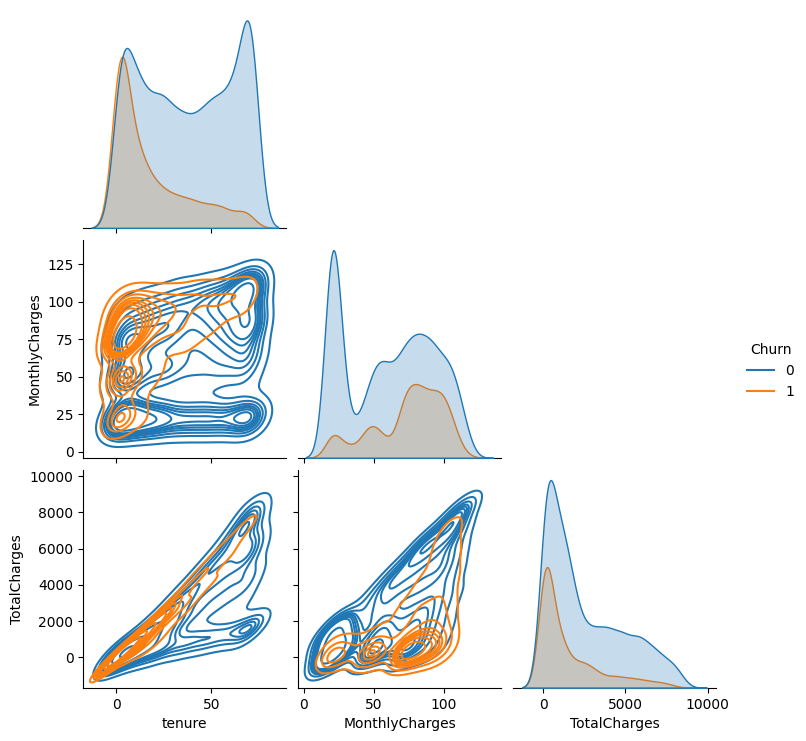

In [20]:
sns.pairplot(
    df[[*numerical_columns, "Churn"]],
    hue="Churn",
    hue_order=[0, 1],
    corner=True,
    markers=["o", "s"],
    kind="kde"
);

### Categorical Values

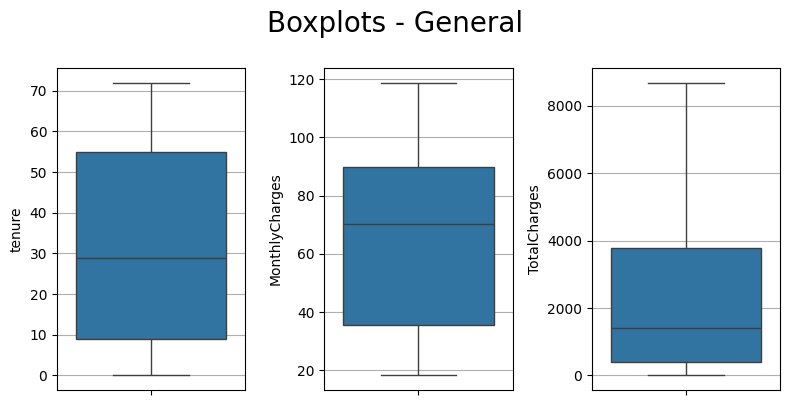

In [21]:
ncols=3
nrows=1

fig, axs = plt.subplots(ncols=ncols, figsize=(8, 4))

for i in range(ncols):
    axs[i].grid()
    sns.boxplot(
        data=df,
        y=numerical_columns[i],
        ax=axs[i]
    )

fig.suptitle("Boxplots - General", fontsize=20, y=1.0)
fig.tight_layout()
plt.show()

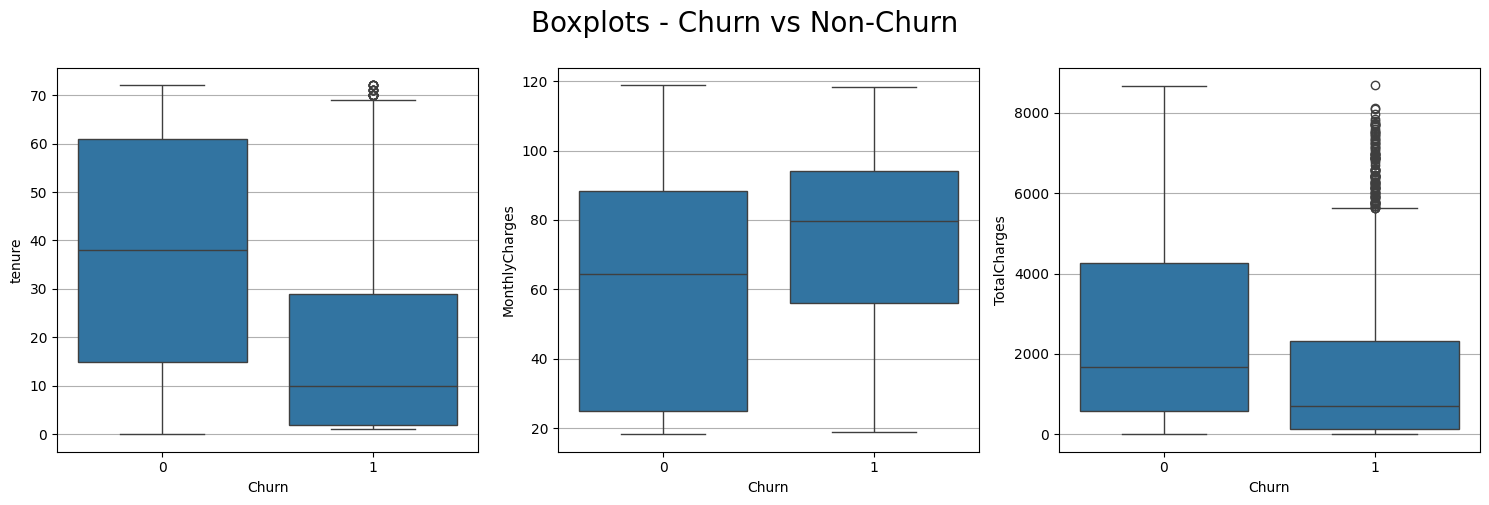

In [22]:
ncols=3
nrows=1

fig, axs = plt.subplots(ncols=ncols, figsize=(15, 5))

for i in range(ncols):
    axs[i].grid()
    sns.boxplot(
        data=df,
        y=numerical_columns[i],
        ax=axs[i],
        x="Churn"
    )

fig.suptitle("Boxplots - Churn vs Non-Churn", fontsize=20, y=1.0)
fig.tight_layout()
plt.show()

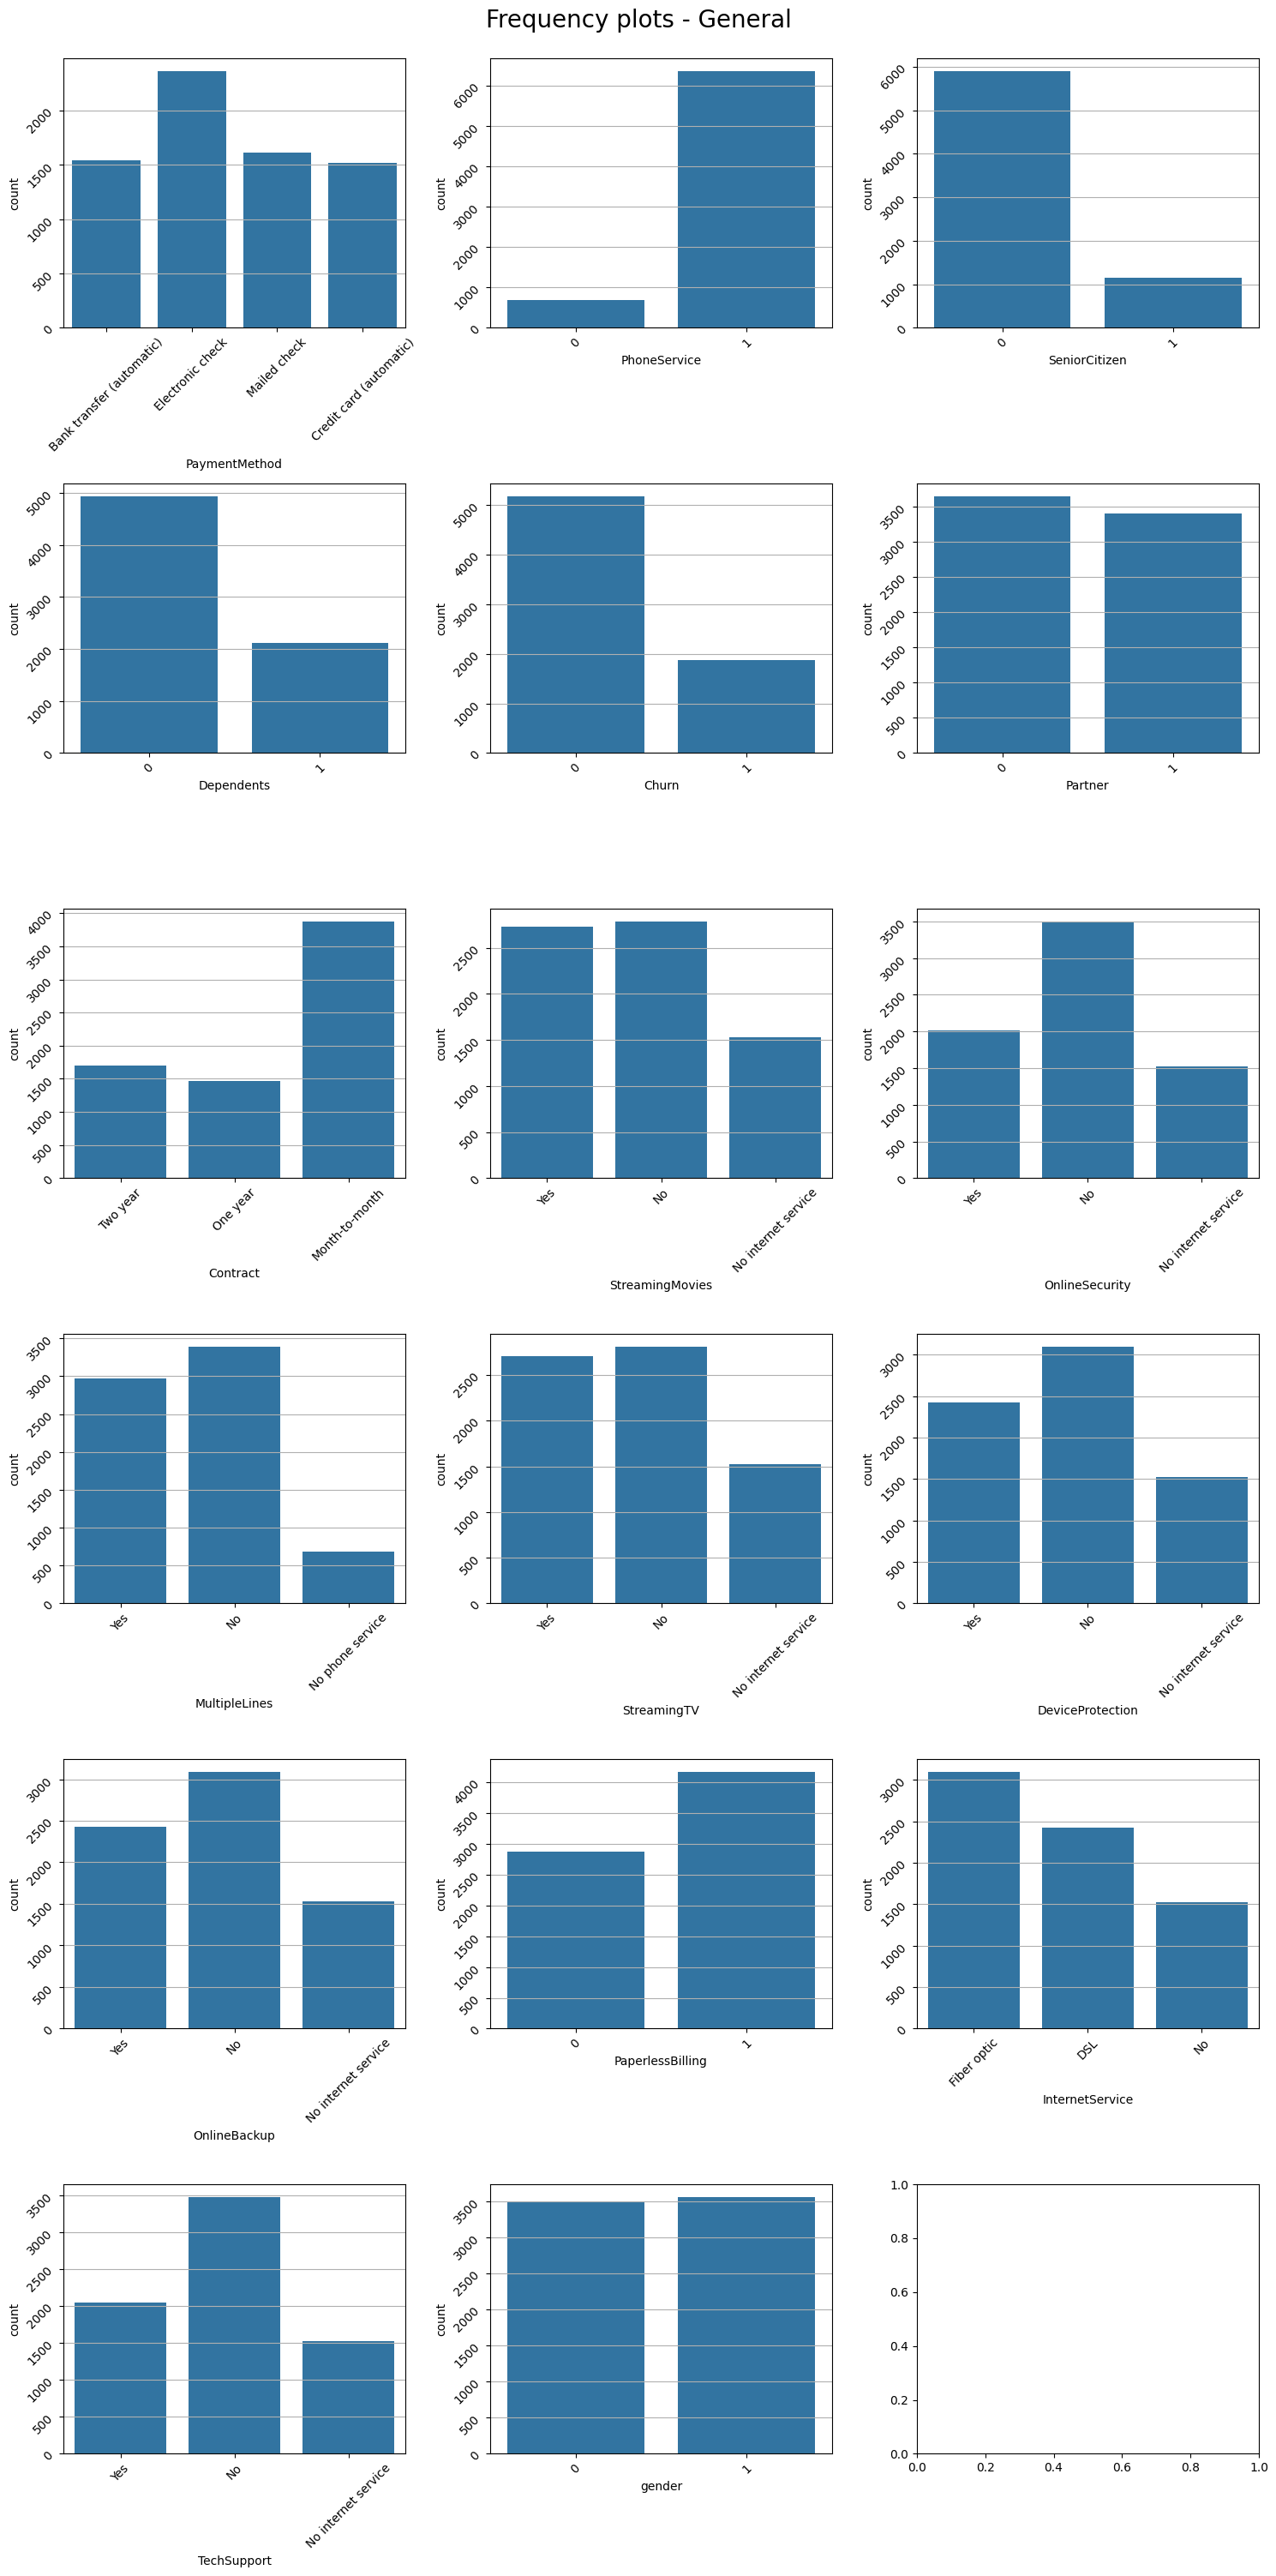

In [23]:
ncols=3
nrows=6

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 30))
count = 0

for i in range(nrows):
    for j in range(ncols):
        if count >= len(categorical_columns):
            break
        axs[i][j].grid()
        axs[i][j].tick_params(labelrotation=45)
        sns.countplot(
            data=df,
            x=categorical_columns[count],
            ax=axs[i][j]
        )
        count+=1

fig.suptitle("Frequency plots - General", fontsize=20, y=1.0)
fig.tight_layout()
plt.show();

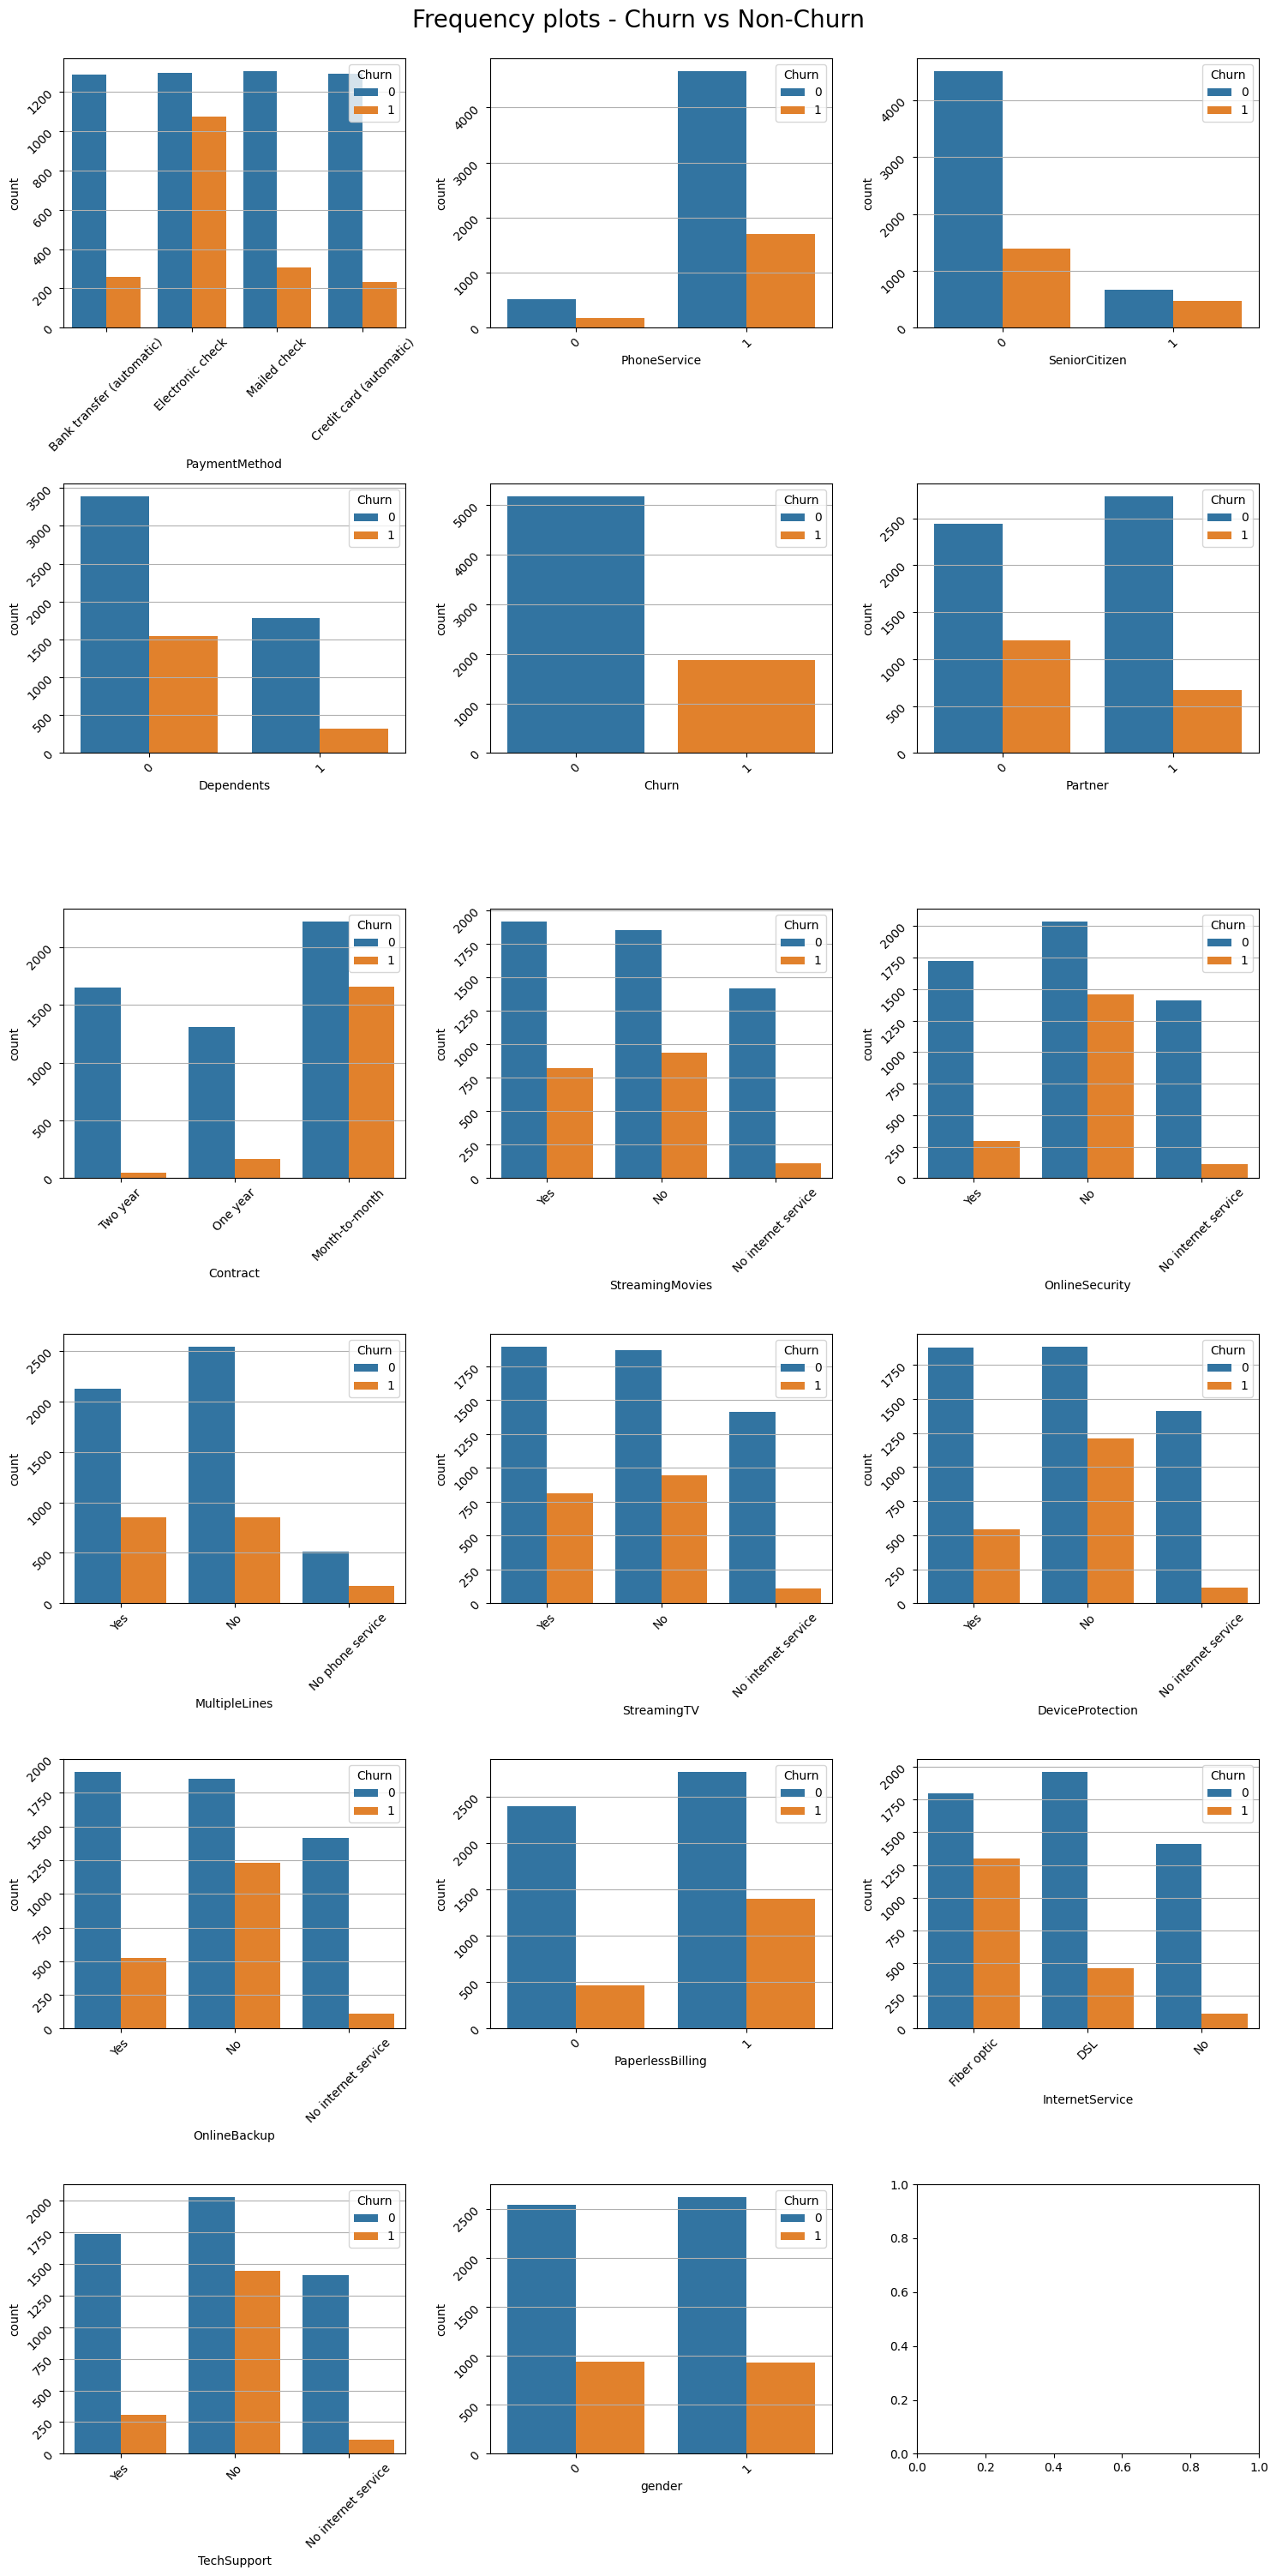

In [24]:
ncols=3
nrows=6

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 30))

count = 0

for i in range(nrows):
    for j in range(ncols):
        if count >= len(categorical_columns):
            break
        axs[i][j].grid()
        axs[i][j].tick_params(labelrotation=45)
        sns.countplot(
            data=df,
            x=categorical_columns[count],
            hue="Churn",
            hue_order=[0, 1],
            ax=axs[i][j]
        )
        count+=1

fig.suptitle("Frequency plots - Churn vs Non-Churn", fontsize=20, y=1.0)
fig.tight_layout()
plt.show();

### All Together

#### By Tenure

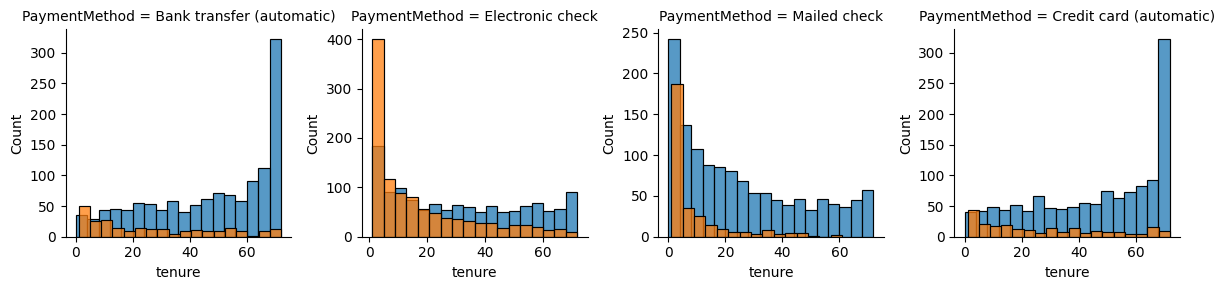

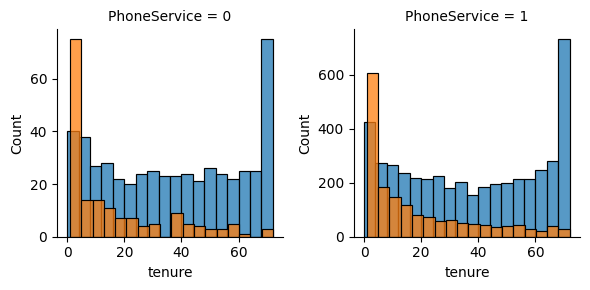

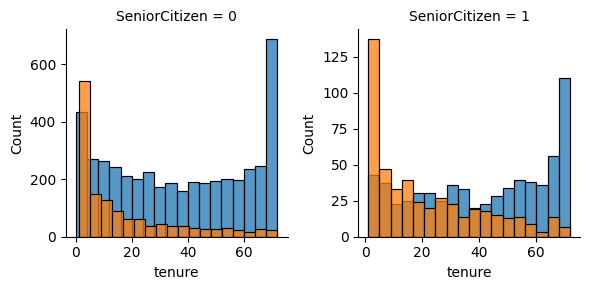

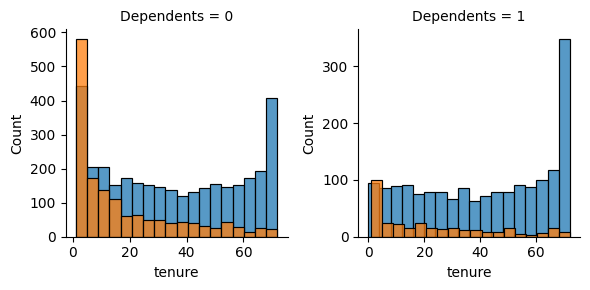

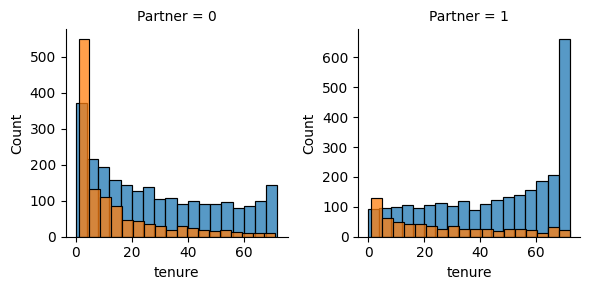

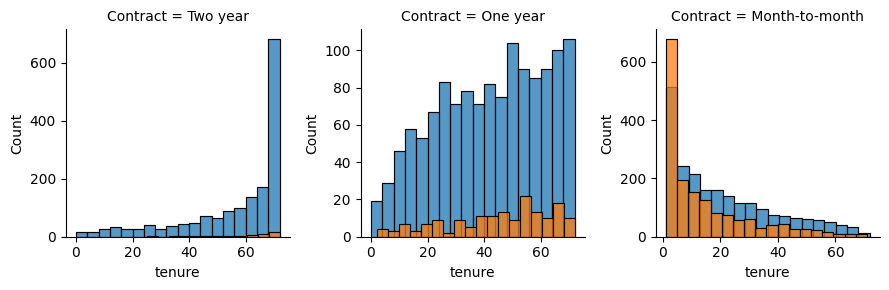

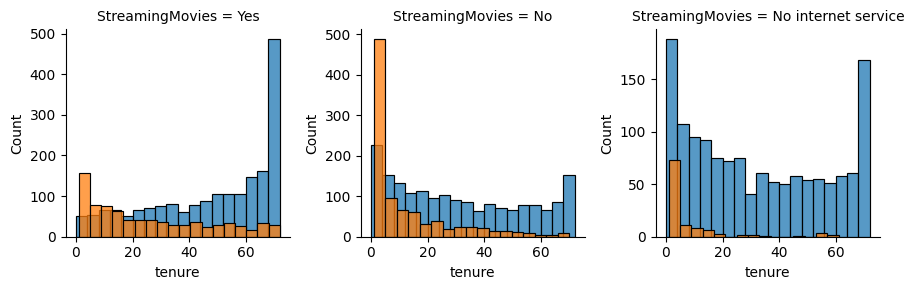

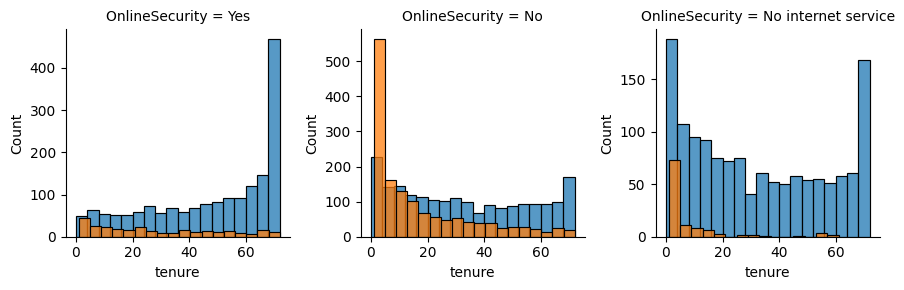

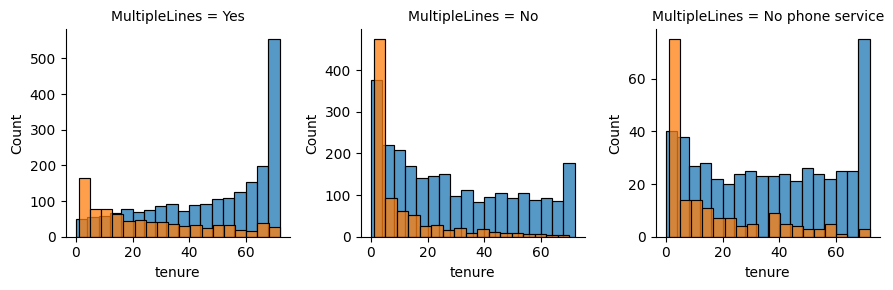

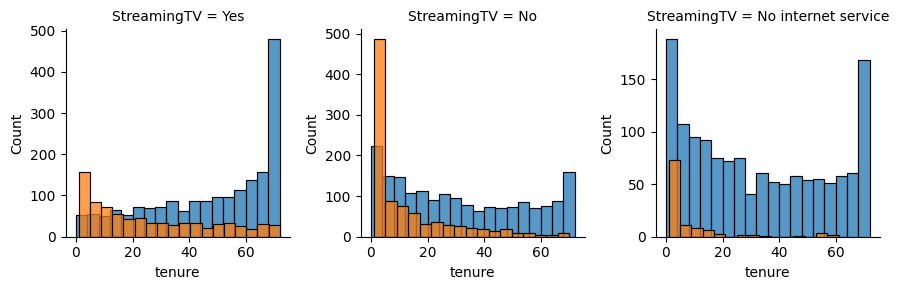

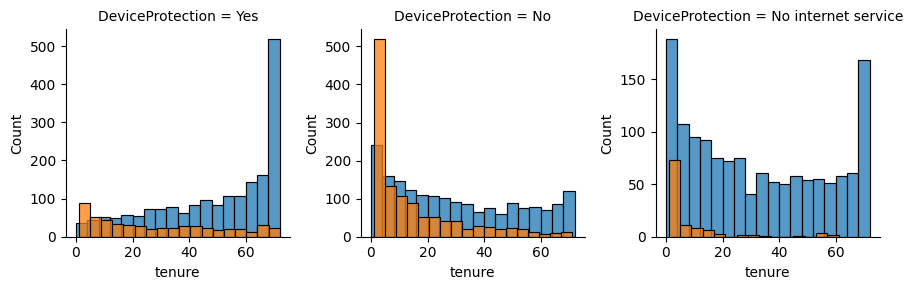

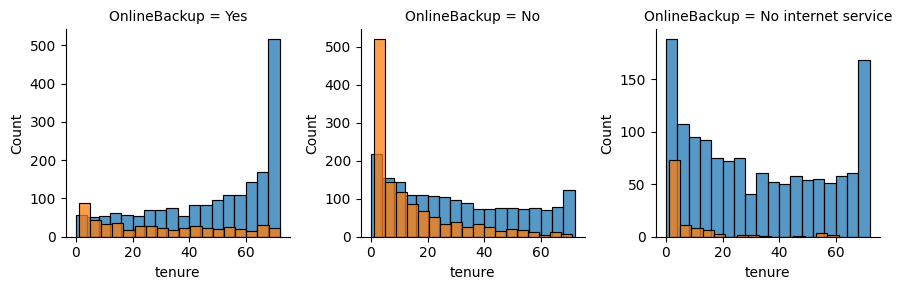

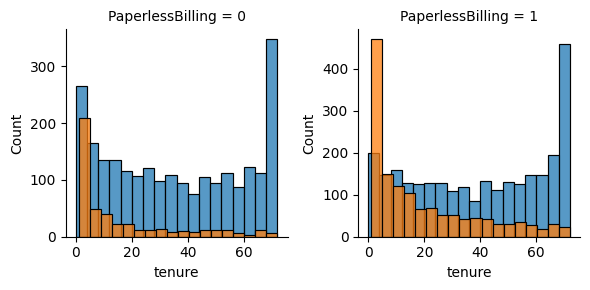

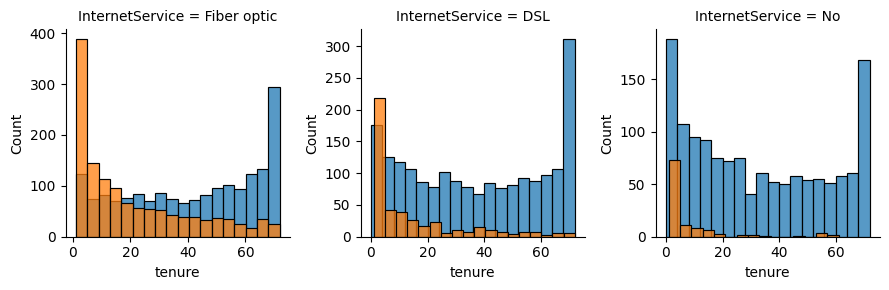

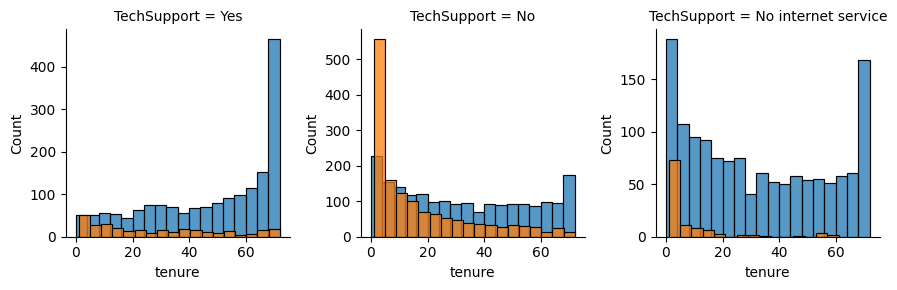

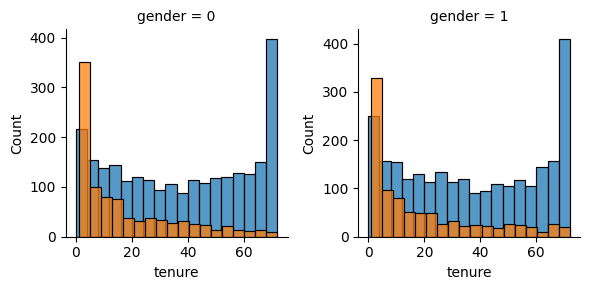

In [25]:
for category in categorical_columns:
    try:
        g = sns.FacetGrid(
            df[[*numerical_columns, "Churn", category]],
            col=category,
            hue="Churn",
            hue_order=[0, 1],
            sharey=False,
            sharex=False
        )
        g.map(sns.histplot, "tenure", binwidth=4);
    except:
        pass

#### By Total Charges

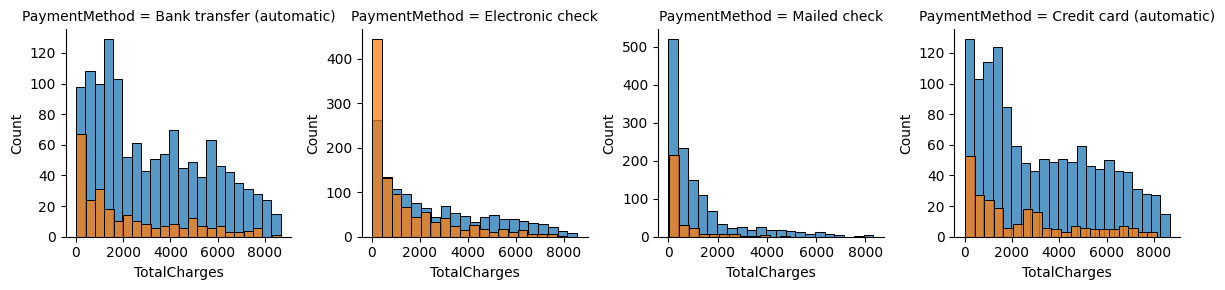

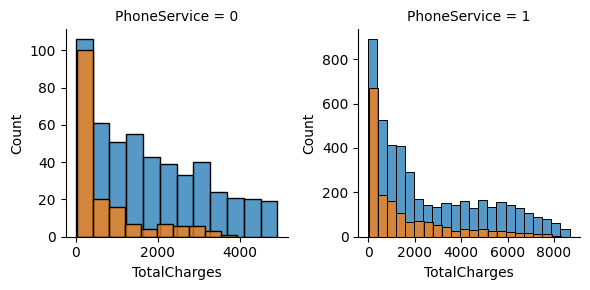

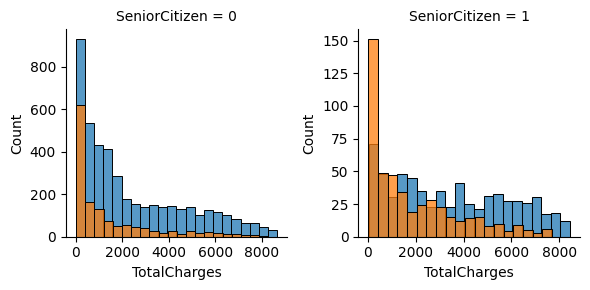

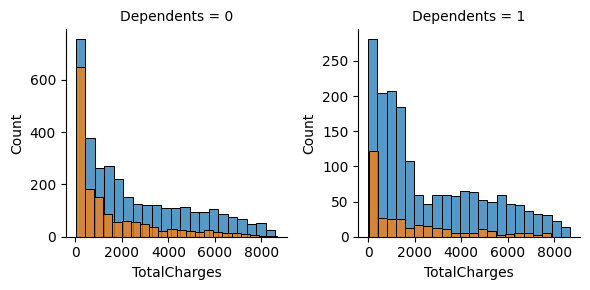

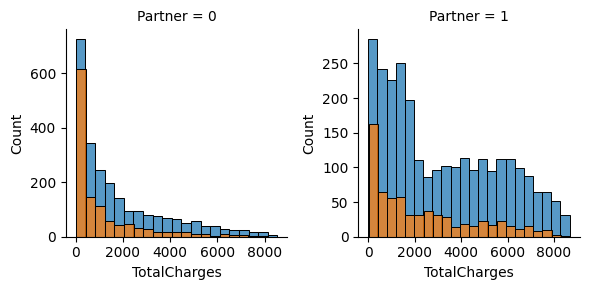

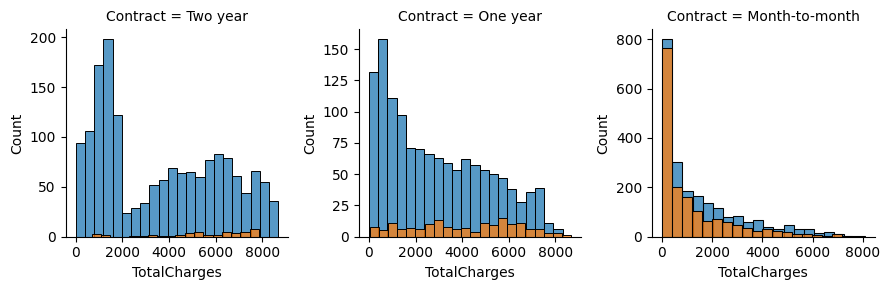

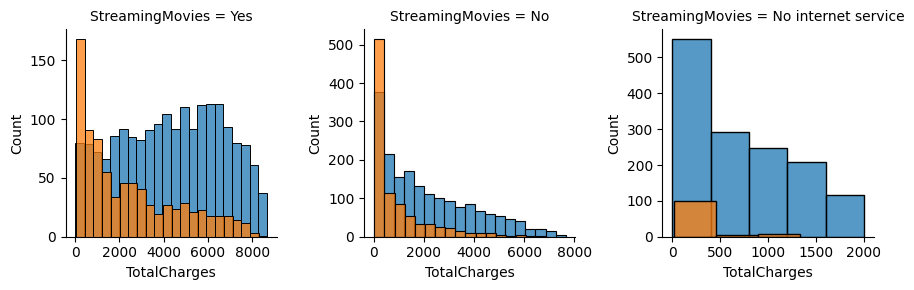

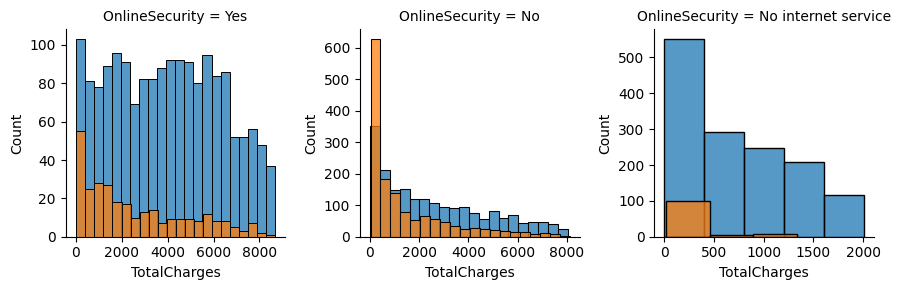

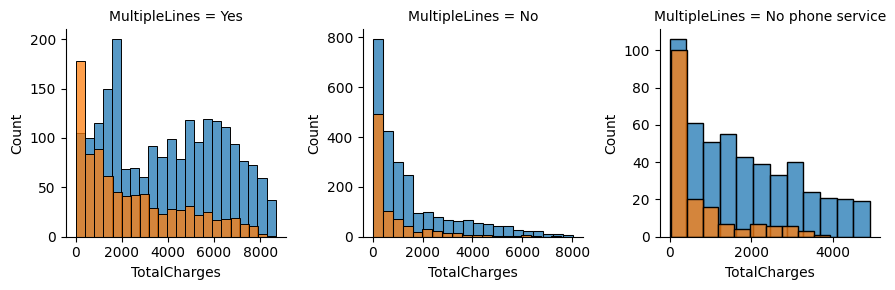

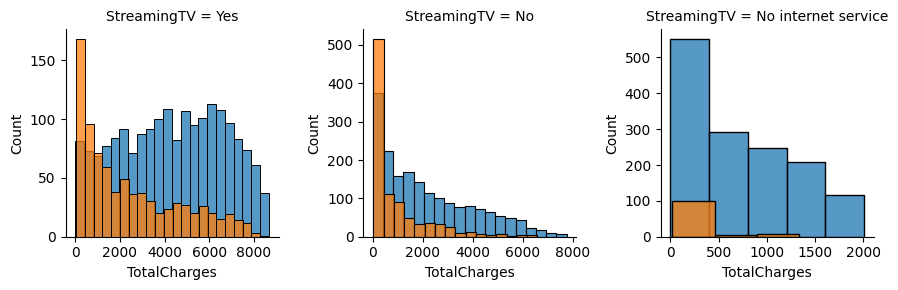

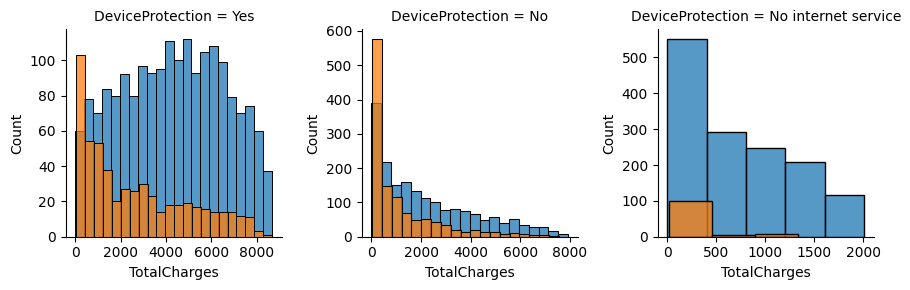

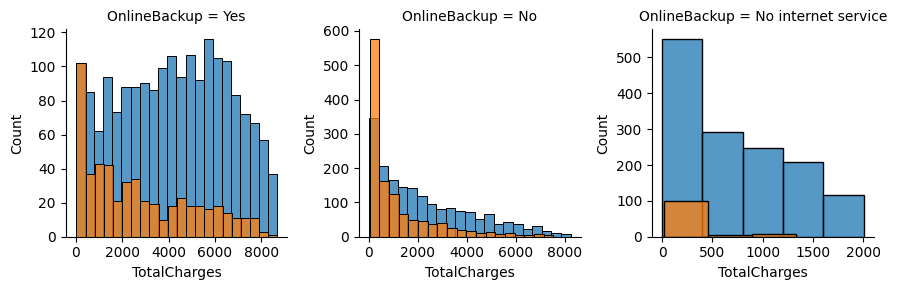

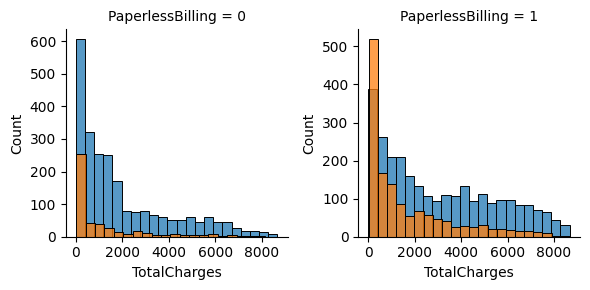

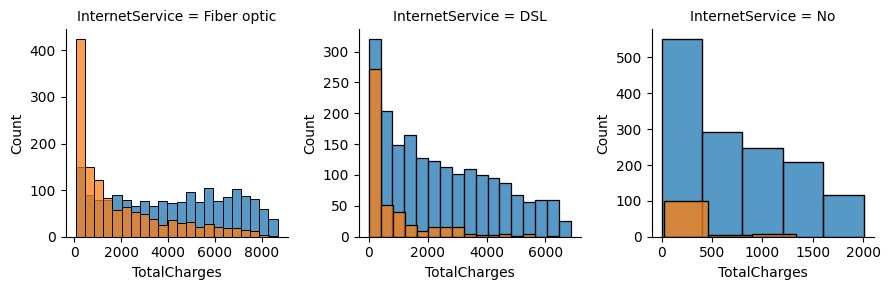

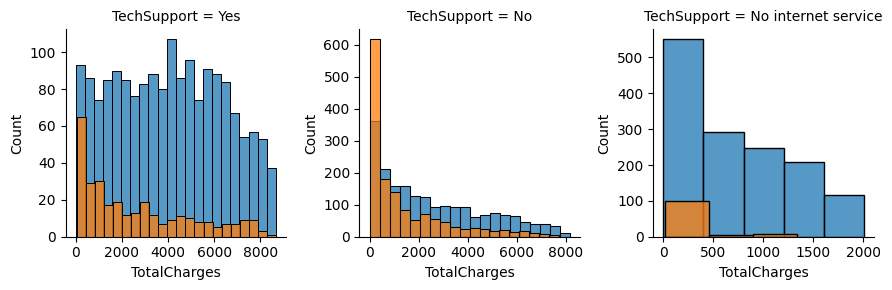

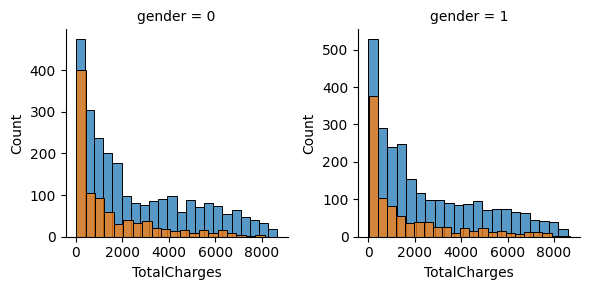

In [26]:
for category in categorical_columns:
    try:
        g = sns.FacetGrid(
            df[[*numerical_columns, "Churn", category]],
            col=category,
            hue="Churn",
            hue_order=[0, 1],
            sharey=False,
            sharex=False
        )
        g.map(sns.histplot, "TotalCharges", binwidth=400);
    except:
        pass

#### By Monthly Charge

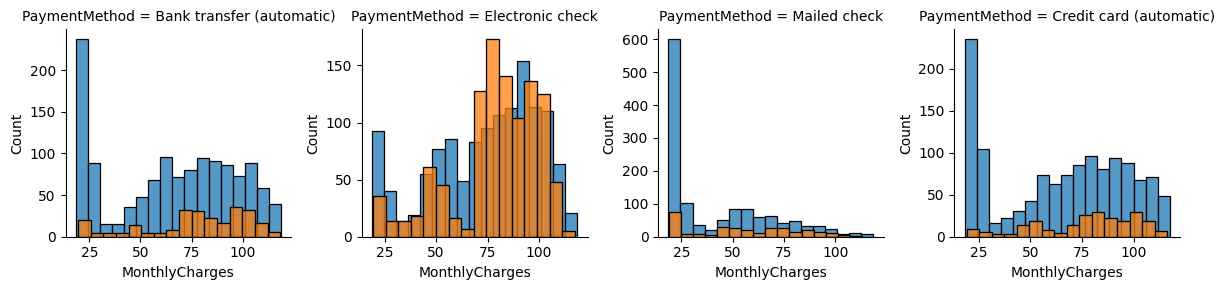

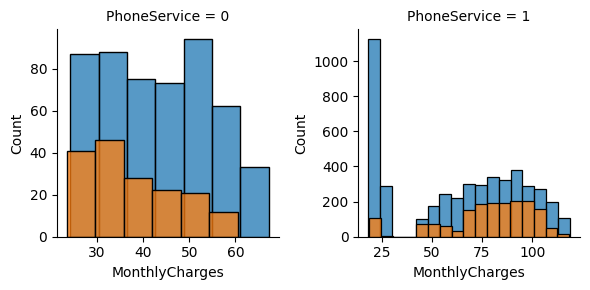

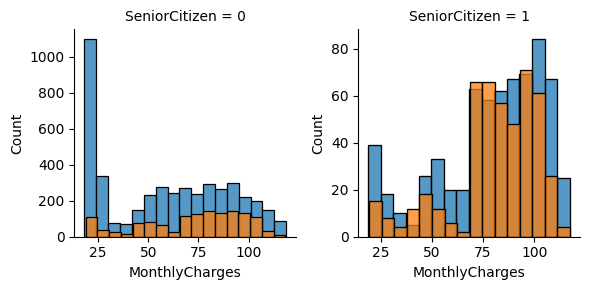

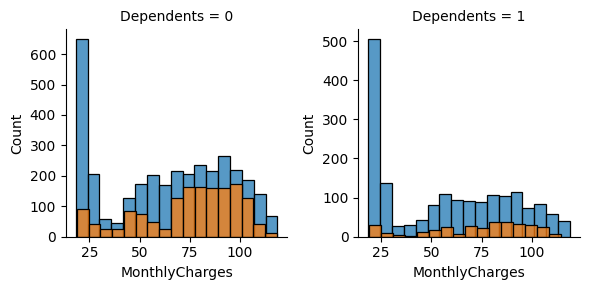

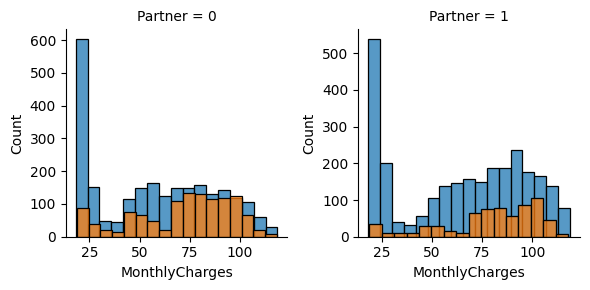

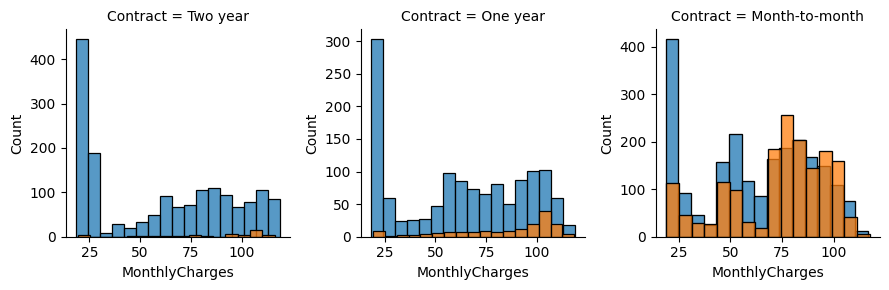

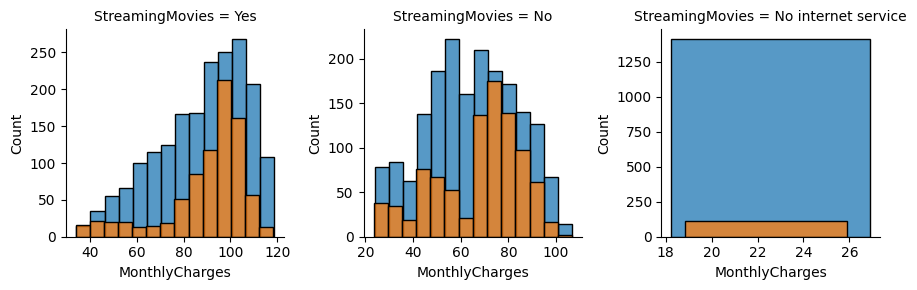

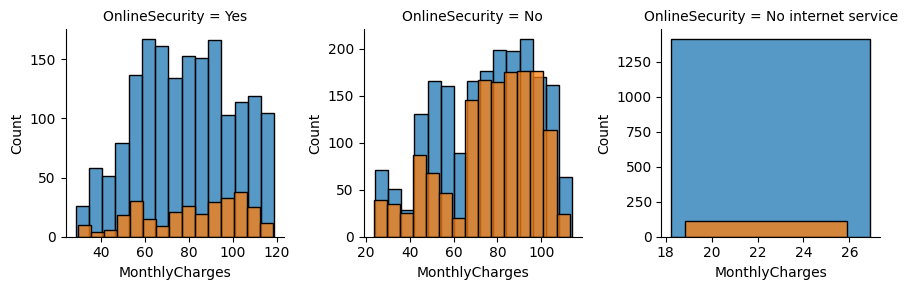

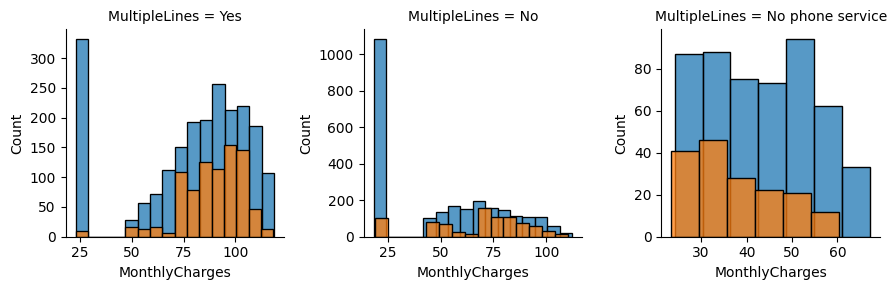

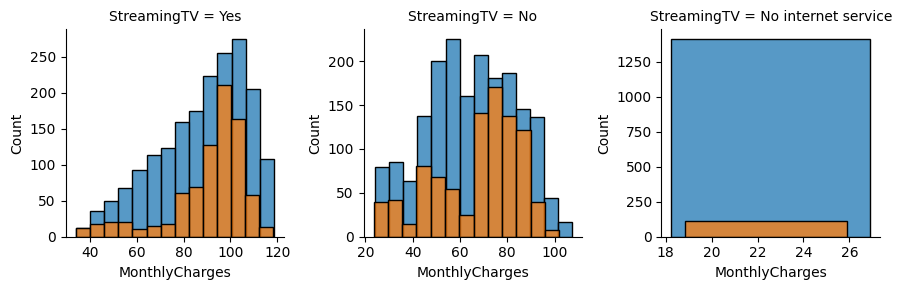

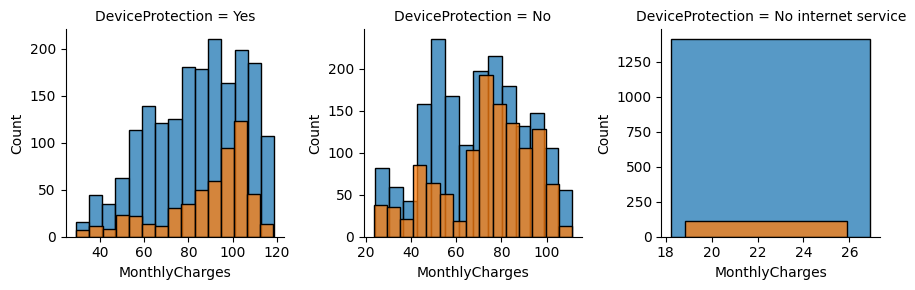

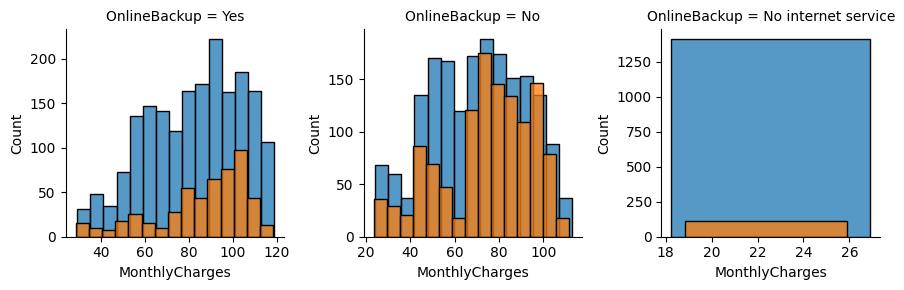

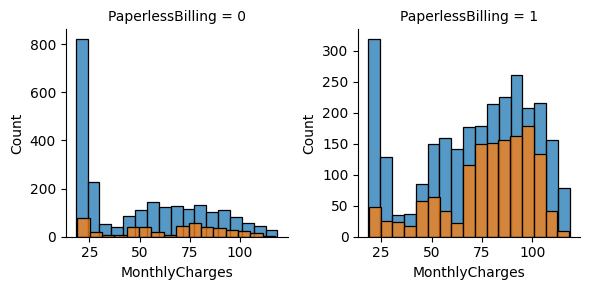

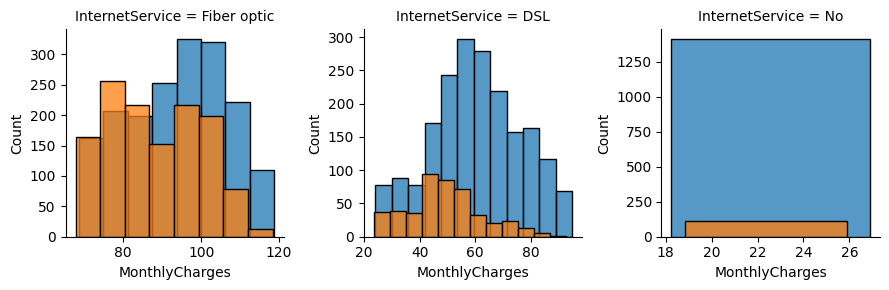

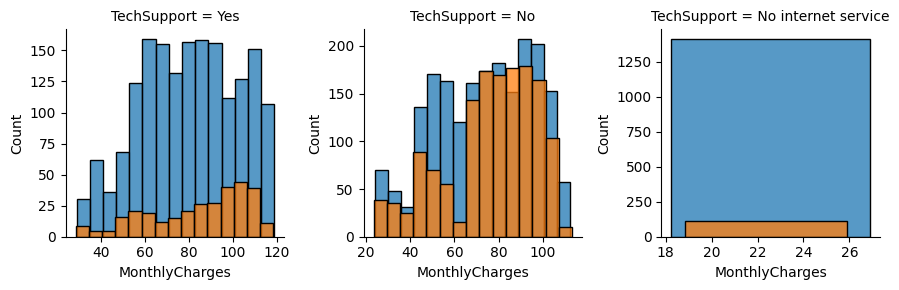

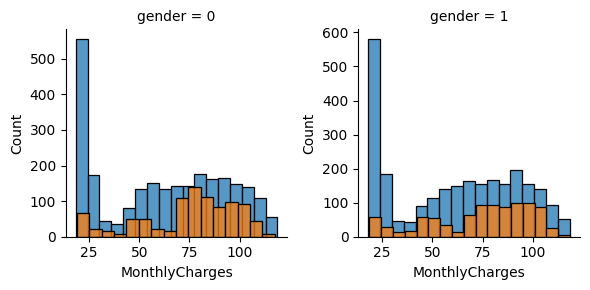

In [27]:
for category in categorical_columns:
    try:
        g = sns.FacetGrid(
            df[[*numerical_columns, "Churn", category]],
            col=category,
            hue="Churn",
            hue_order=[0, 1],
            sharey=False,
            sharex=False
        )
        g.map(sns.histplot, "MonthlyCharges", binwidth=6);
    except:
        pass

### Correlation

In [28]:
df_corr = df.copy()
df_corr = data_preparer.prepare_data(df=df_corr, conditionals=True)
df_corr = feature_engine.create_features(df_corr)

In [29]:
corr_pearson = df_corr.corr(method="pearson", numeric_only=True)
corr_kendall = df_corr.corr(method="kendall", numeric_only=True)
corr_spearman = df_corr.corr(method="spearman", numeric_only=True)

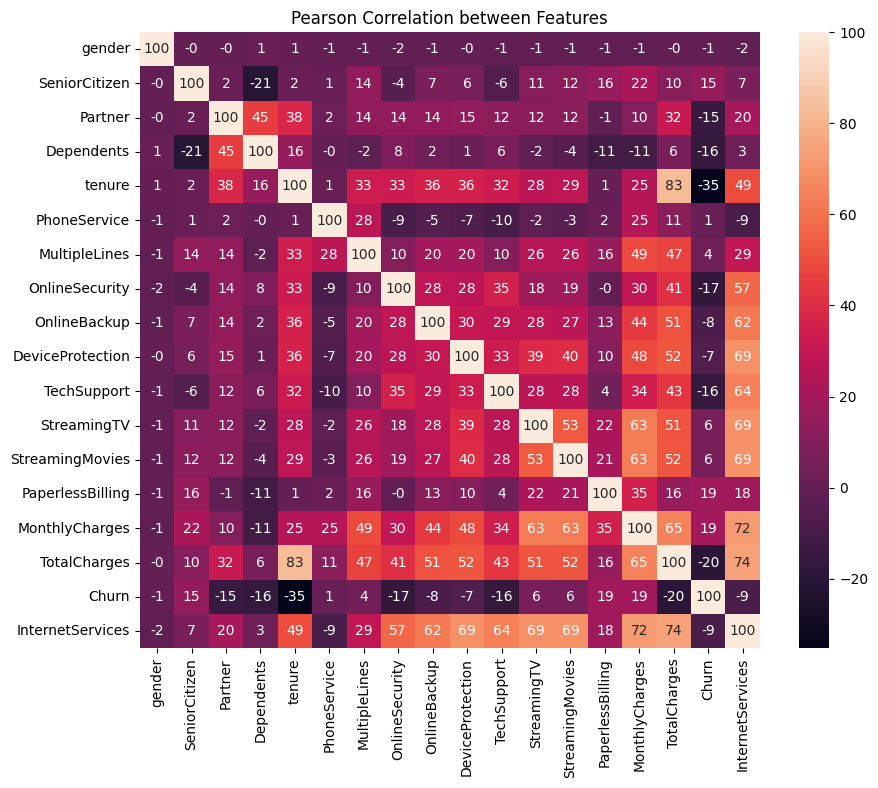

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson*100, annot=True, fmt=".0f")
plt.title("Pearson Correlation between Features");

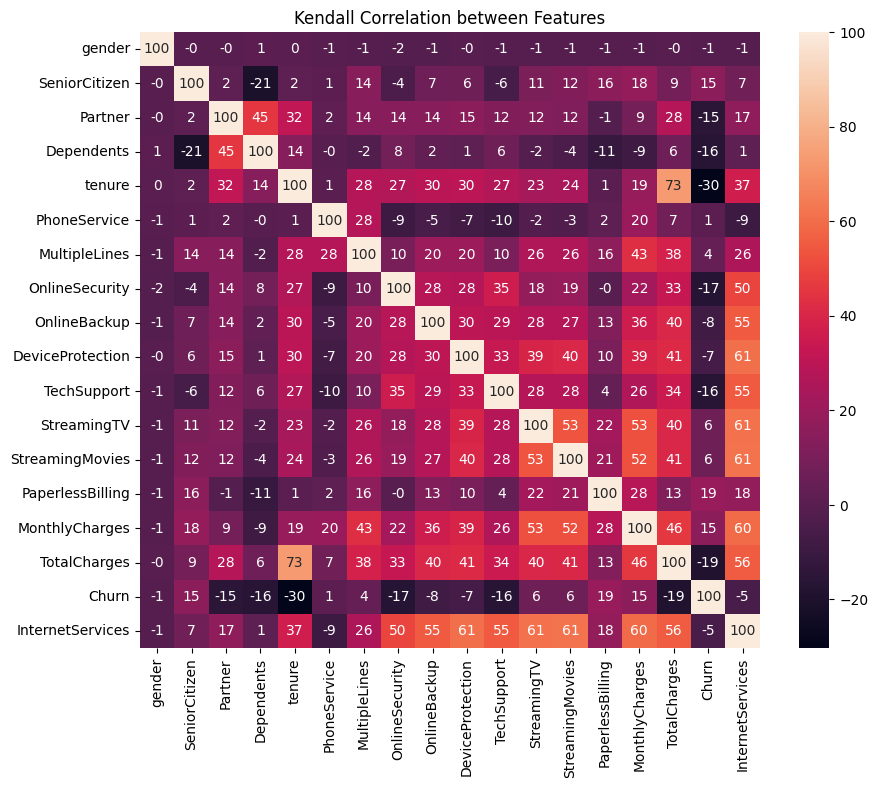

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_kendall*100, annot=True, fmt=".0f")
plt.title("Kendall Correlation between Features");

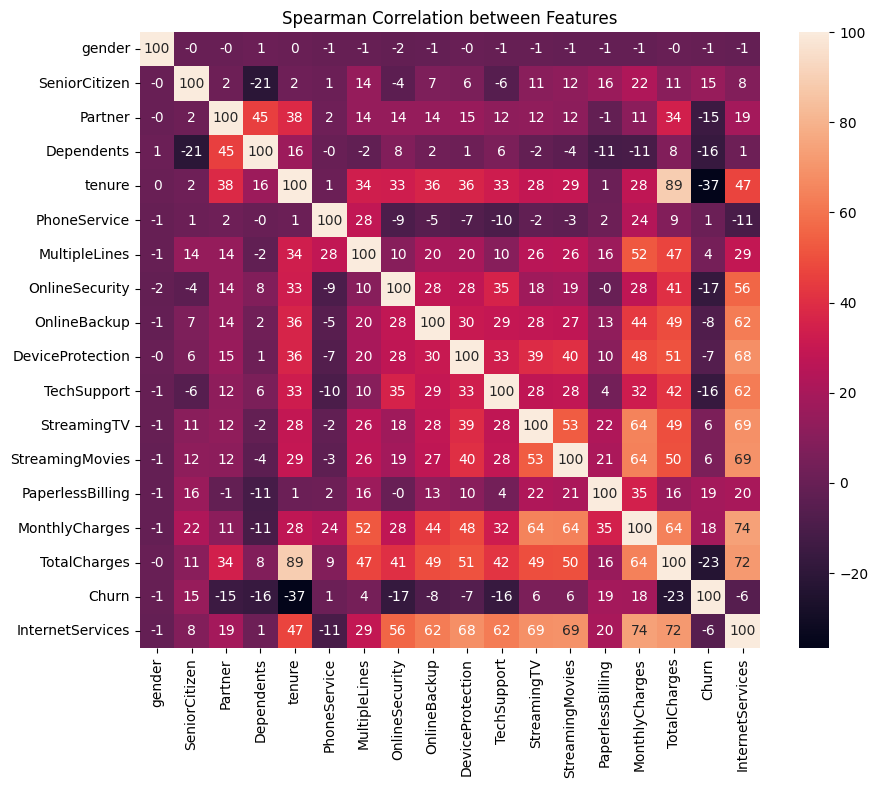

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman*100, annot=True, fmt=".0f")
plt.title("Spearman Correlation between Features");

### Exploring Specific Points

#### Internet Service

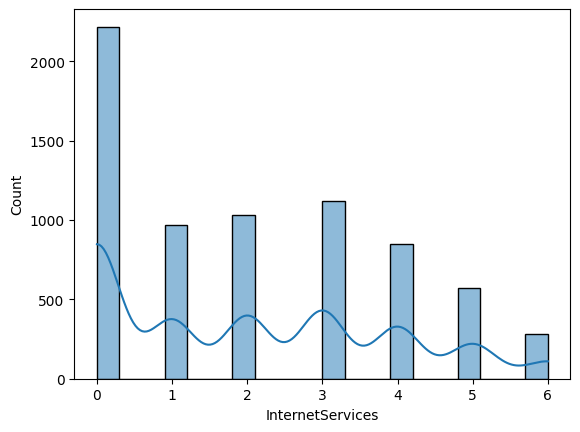

In [33]:
sns.histplot(
    data=df_corr,
    x="InternetServices",
    kde=True,
);

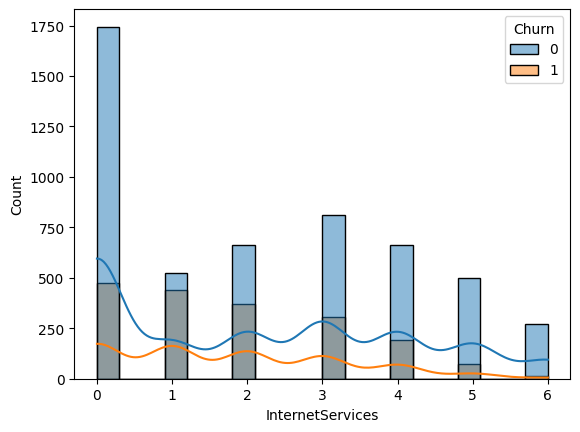

In [34]:
sns.histplot(
    data=df_corr,
    x="InternetServices",
    kde=True,
    hue="Churn",
    hue_order=[0, 1],
);

###  Answered Questions

1. Do people who churn are mainly that with high tenure (used a lot and found a better service)?

> Answer: No, people tend to change within the first few months of service.

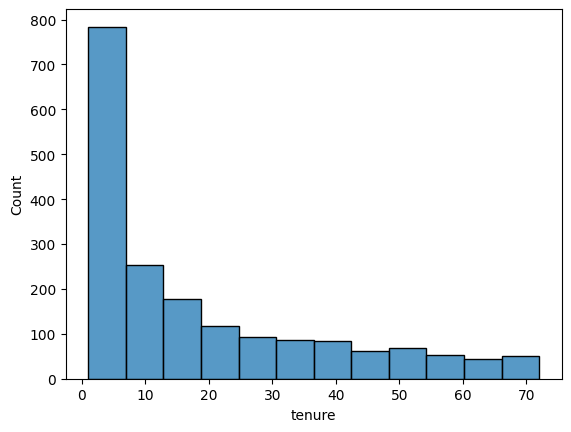

In [35]:
sns.histplot(
    data=df_corr[df_corr.Churn == 1],
    x="tenure",
    binwidth=6
);

2. Do most people who drop out have a monthly contract (is it harder to stay loyal than an annual contract)?

> Answer: Yes. An alternative is to promote more annual contracts (through discounts, offers, sweepstakes, etc.) to retain customers and generate loyalty while customers truly get to know the services and get closer to the company.

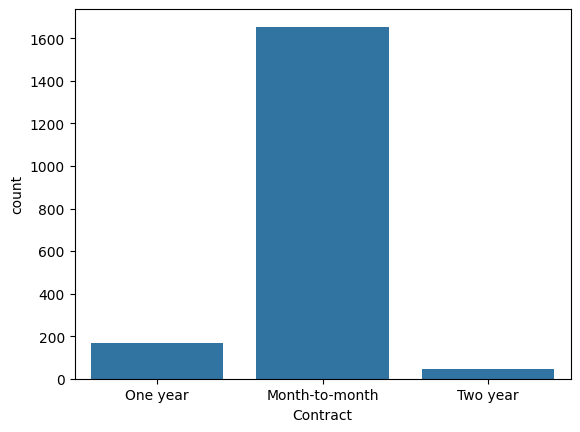

In [36]:
sns.countplot(
    data=df_corr[df_corr.Churn == 1],
    x="Contract"
);

In [37]:
value = round(df_corr[df_corr.Churn == 1][df_corr.Contract == "Month-to-month"].count()[0]*100/df_corr[df_corr.Churn == 1].count()[0], 2)
print(f"Around {value}% of the churned customers had a month-to-month contract.")

Around 88.55% of the churned customers had a month-to-month contract.



3. Do most people who drop out use DSL or no internet service at all (they drop out due to limited resources)?

> Answer: No, the fiber optic has the most churn rate.

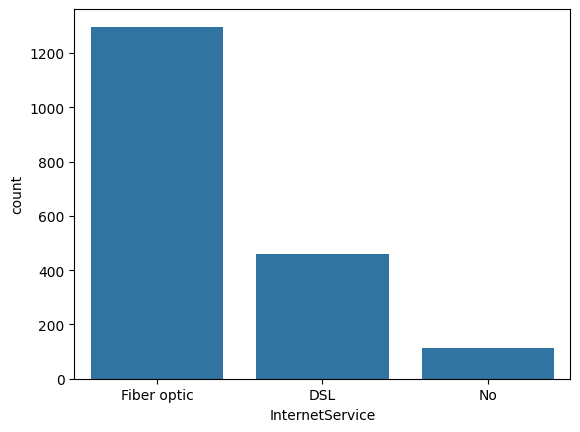

In [38]:
sns.countplot(
    data=df_corr[df_corr.Churn == 1],
    x="InternetService"
);

In [39]:
value = round(df_corr[df_corr.Churn == 1][df_corr.InternetService == "Fiber optic"].count()[0]*100/df_corr[df_corr.Churn == 1].count()[0], 2)
print(f"Around {value}% of the churned customers used the Fiber optic internet service.")

Around 69.4% of the churned customers used the Fiber optic internet service.


4. Are there pricing inconsistencies in the services provided (any service too expensive for a specific scenario)?

> Answer: No inconsistencies were found, but we can say something that helps us to understand a little the aspect of question 3: although the prices are separable, even due to the quantity of services provided, the price of fiber optics is considerably higher than that of other internet services.

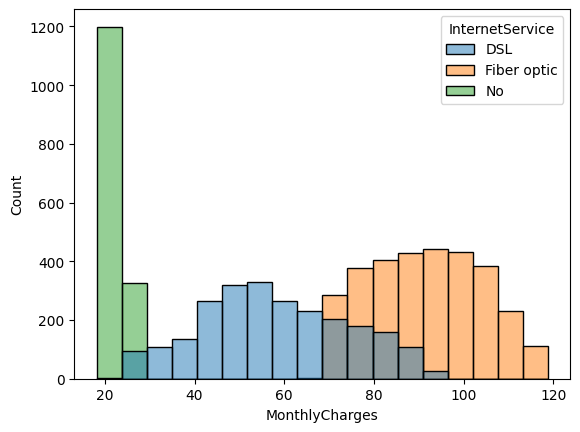

In [40]:
sns.histplot(
    data=df_corr,
    x="MonthlyCharges",
    hue="InternetService",
    hue_order=["DSL", "Fiber optic", "No"]
);

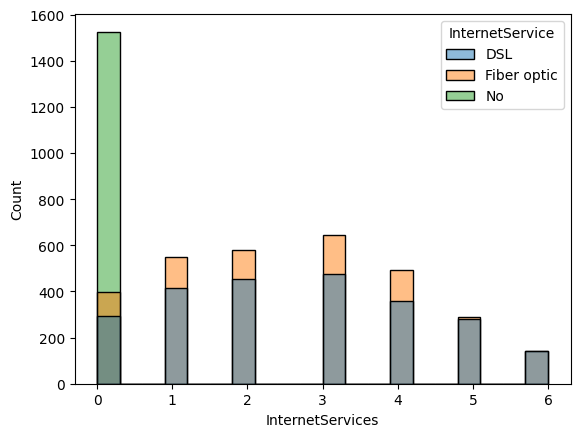

In [41]:
sns.histplot(
    data=df_corr,
    x="InternetServices",
    hue="InternetService",
    hue_order=["DSL", "Fiber optic", "No"]
);

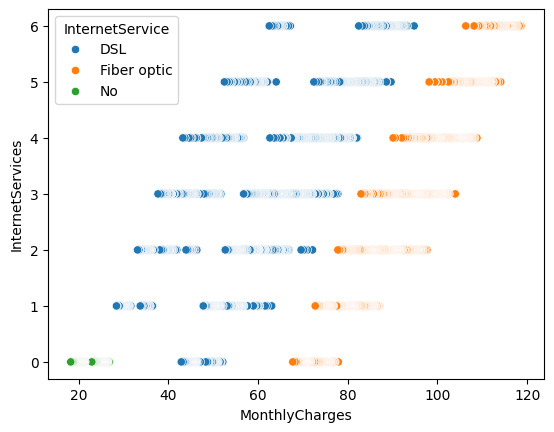

In [42]:
sns.scatterplot(
    data=df_corr,
    x="MonthlyCharges",
    y="InternetServices",
    hue="InternetService",
    hue_order=["DSL", "Fiber optic", "No"]
);

5. Of the people who abandoned the company's services, is there a high rate in services that they had not contracted for (services that perhaps would have made a difference in the user experience)?

> Answer: Yes, there is a high rate of churn in services that they had not contracted for: Online security, online backup, device protection and tech support. Despite this, only two stood out: **tech support** and **online security**. Because the non-contracting of services by users who abandoned was high during all levels of service contract validity.

Note: The other services had greater abandonment only in the first months of validity.

In [43]:
value1 = round(
    df_corr[df_corr.Churn == 1][df_corr.TechSupport == 0].count()[0]*100/df_corr[df_corr.Churn == 1].count()[0],
    2
)

value2 = round(
    df_corr[df_corr.Churn == 1][df_corr.OnlineSecurity == 0].count()[0]*100/df_corr[df_corr.Churn == 1].count()[0],
    2
)

print(f"Around {value1}% without tech support.")
print(f"Around {value2}% without online security.")

Around 83.41% without tech support.
Around 84.22% without online security.


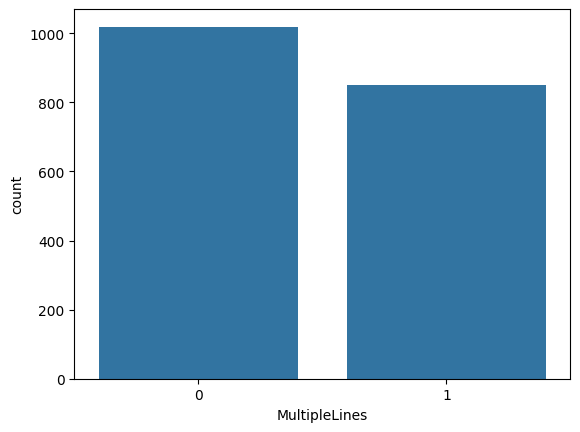

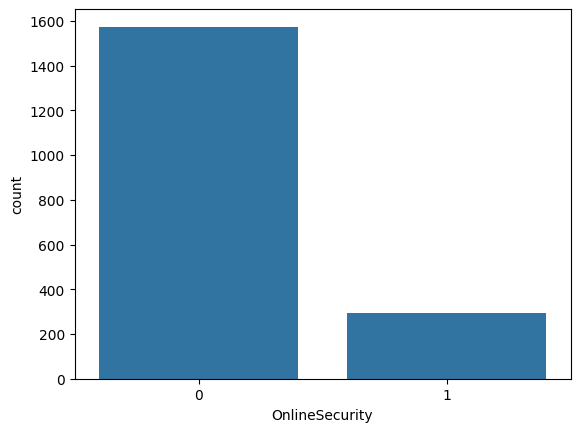

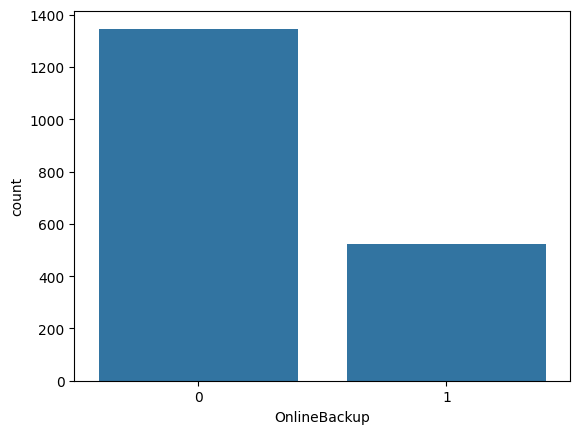

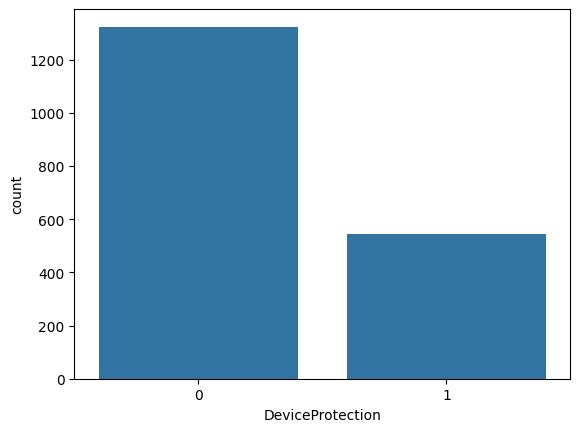

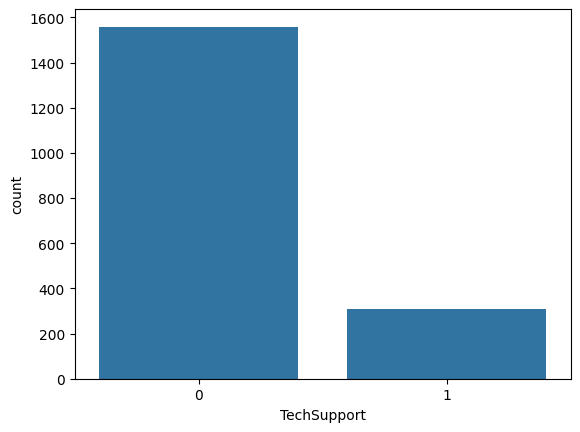

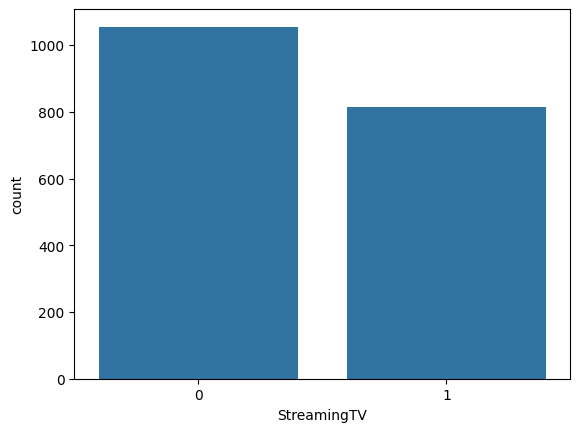

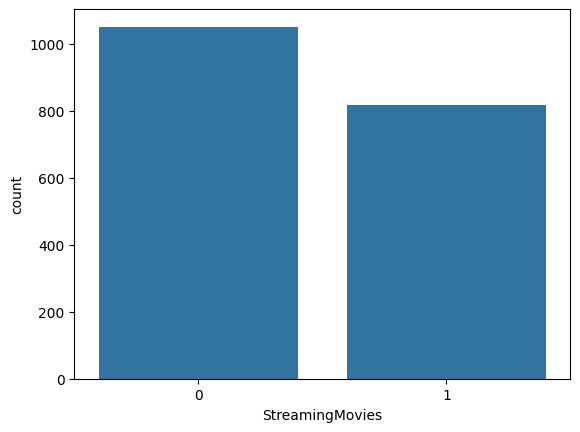

In [44]:
conditional_services = [
        "MultipleLines",
        "OnlineSecurity",
        "OnlineBackup",
        "DeviceProtection",
        "TechSupport",
        "StreamingTV",
        "StreamingMovies"
]

for service in conditional_services:
    sns.countplot(
        data=df_corr[df_corr.Churn == 1],
        x=service
    )
    plt.show();

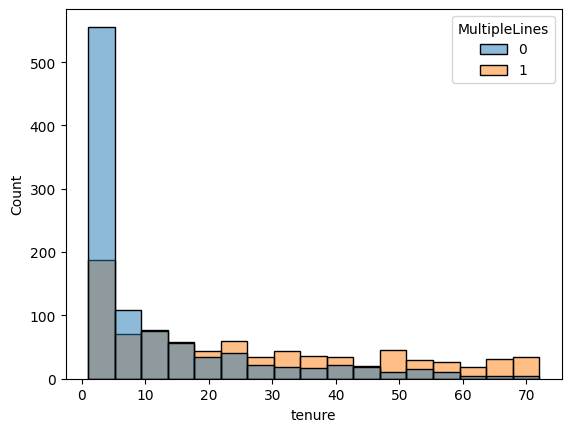

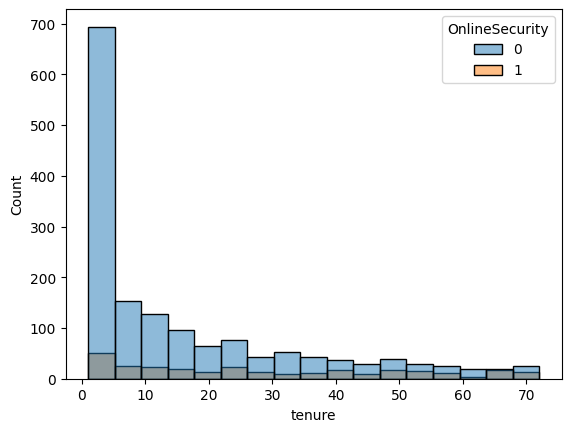

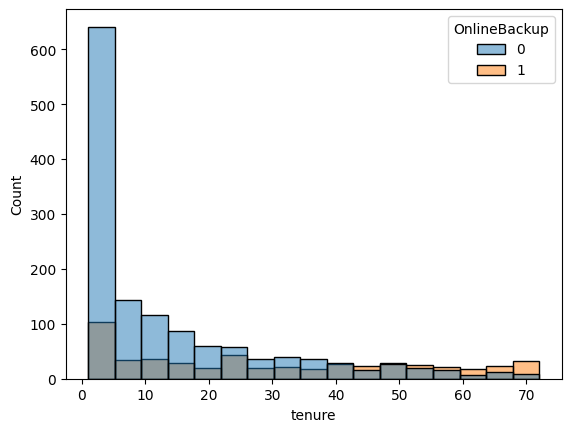

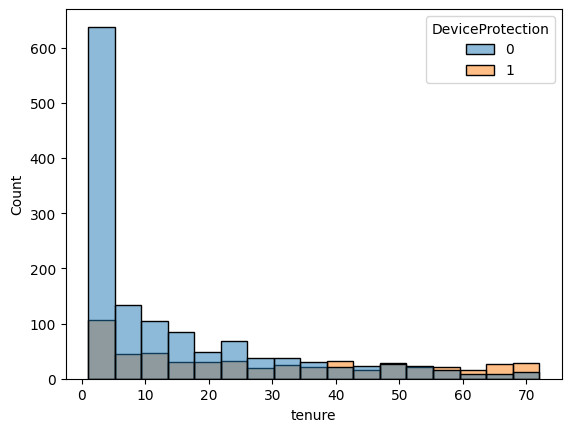

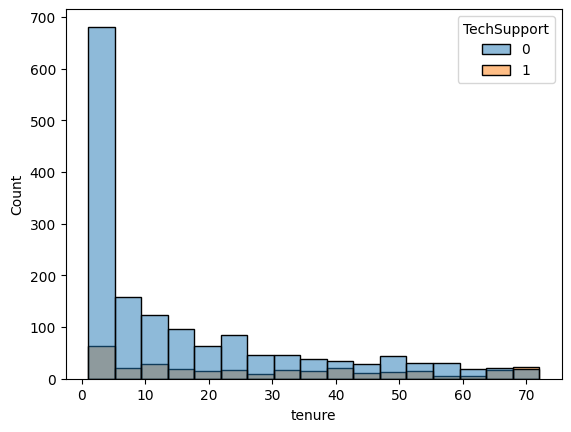

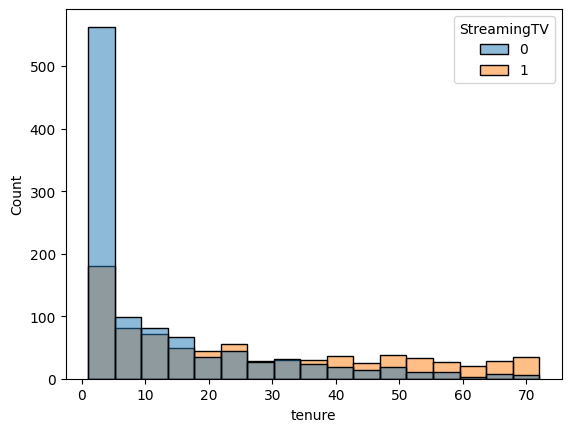

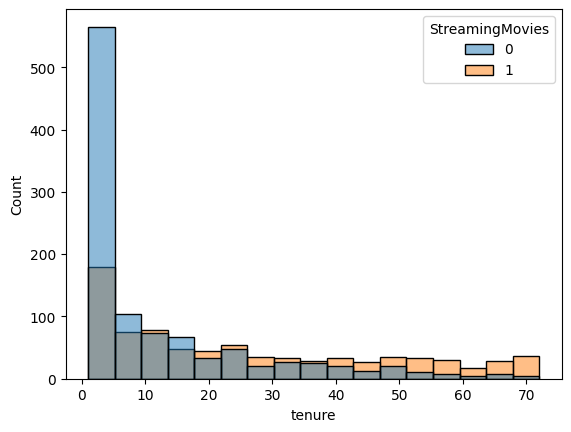

In [45]:
for service in conditional_services:
    sns.histplot(
        data=df_corr[df_corr.Churn == 1],
        x="tenure",
        hue=service
    )
    plt.show();